In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np

from mcopt.pipeline import Pipeline
from mcopt import MorseGraph, ot

sys.path.append('../')
from util import (
  draw_graphs, 
  run_fgw,
)

/workspaces/MCOpt/mcopt/pipeline/pipeline.py:36: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
cmap = 'cool'

dist = 'geo'
hist = 'degree'

alpha = 0.5

In [4]:
pipeline = Pipeline('../../pipeline.config.json')

tangaroa = pipeline.graph('tangaroa:::15')

> Generating tangaroa graph
  config unchanged, loading graph
  loaded 150 frames


In [6]:
src = tangaroa.frames[0]

dests = tangaroa.frames.copy()
dests.pop(0)

len(dests)

9

# Initial Graphs

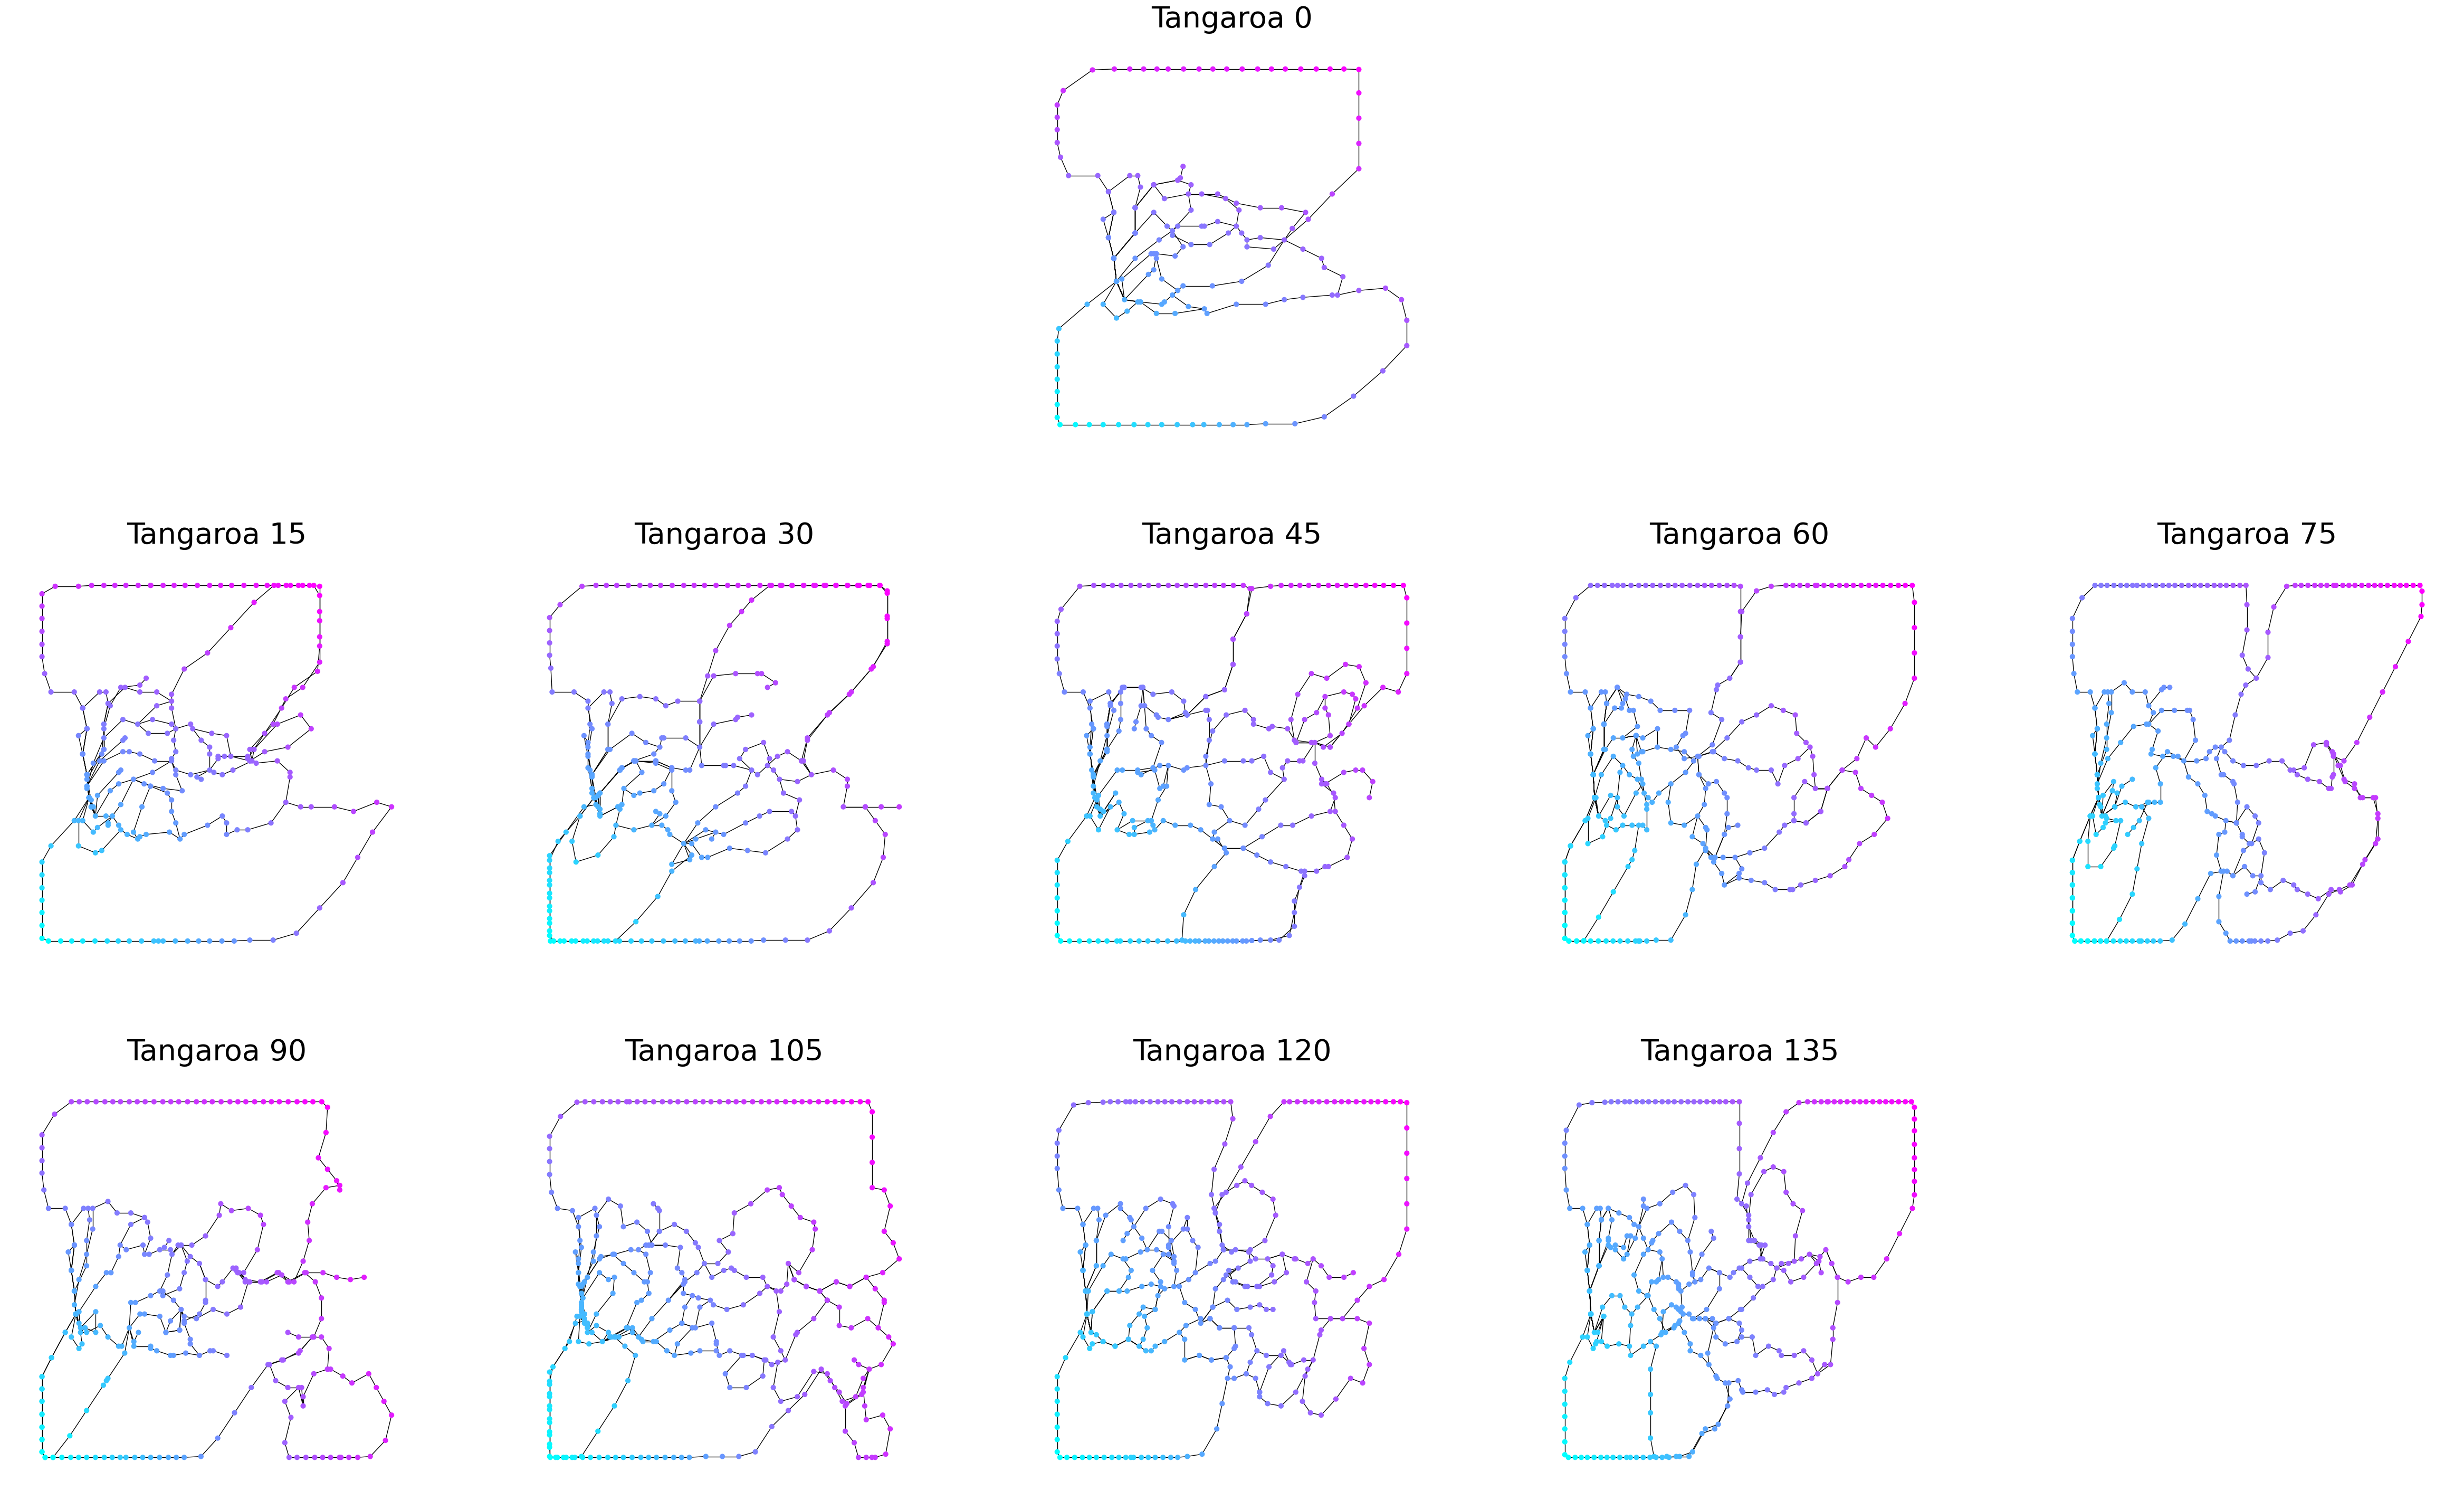

In [9]:
fig = draw_graphs(
  src, dests, 
  width=5, 
  height=3, 
  cmap='cool', 
  src_title='Tangaroa 0', 
  dest_title_fmt='Tangaroa {i}'
)

# fGW Transport

In [10]:
fgw_couplings = run_fgw(
  src, dests, alpha=alpha, hist=hist, dist=dist, random_G0=False
)

Running fGW for each destination:   0%|          | 0/9 [00:00<?, ?it/s]

Text(0.5, 0.98, 'fGW Transport (α = 0.5)')

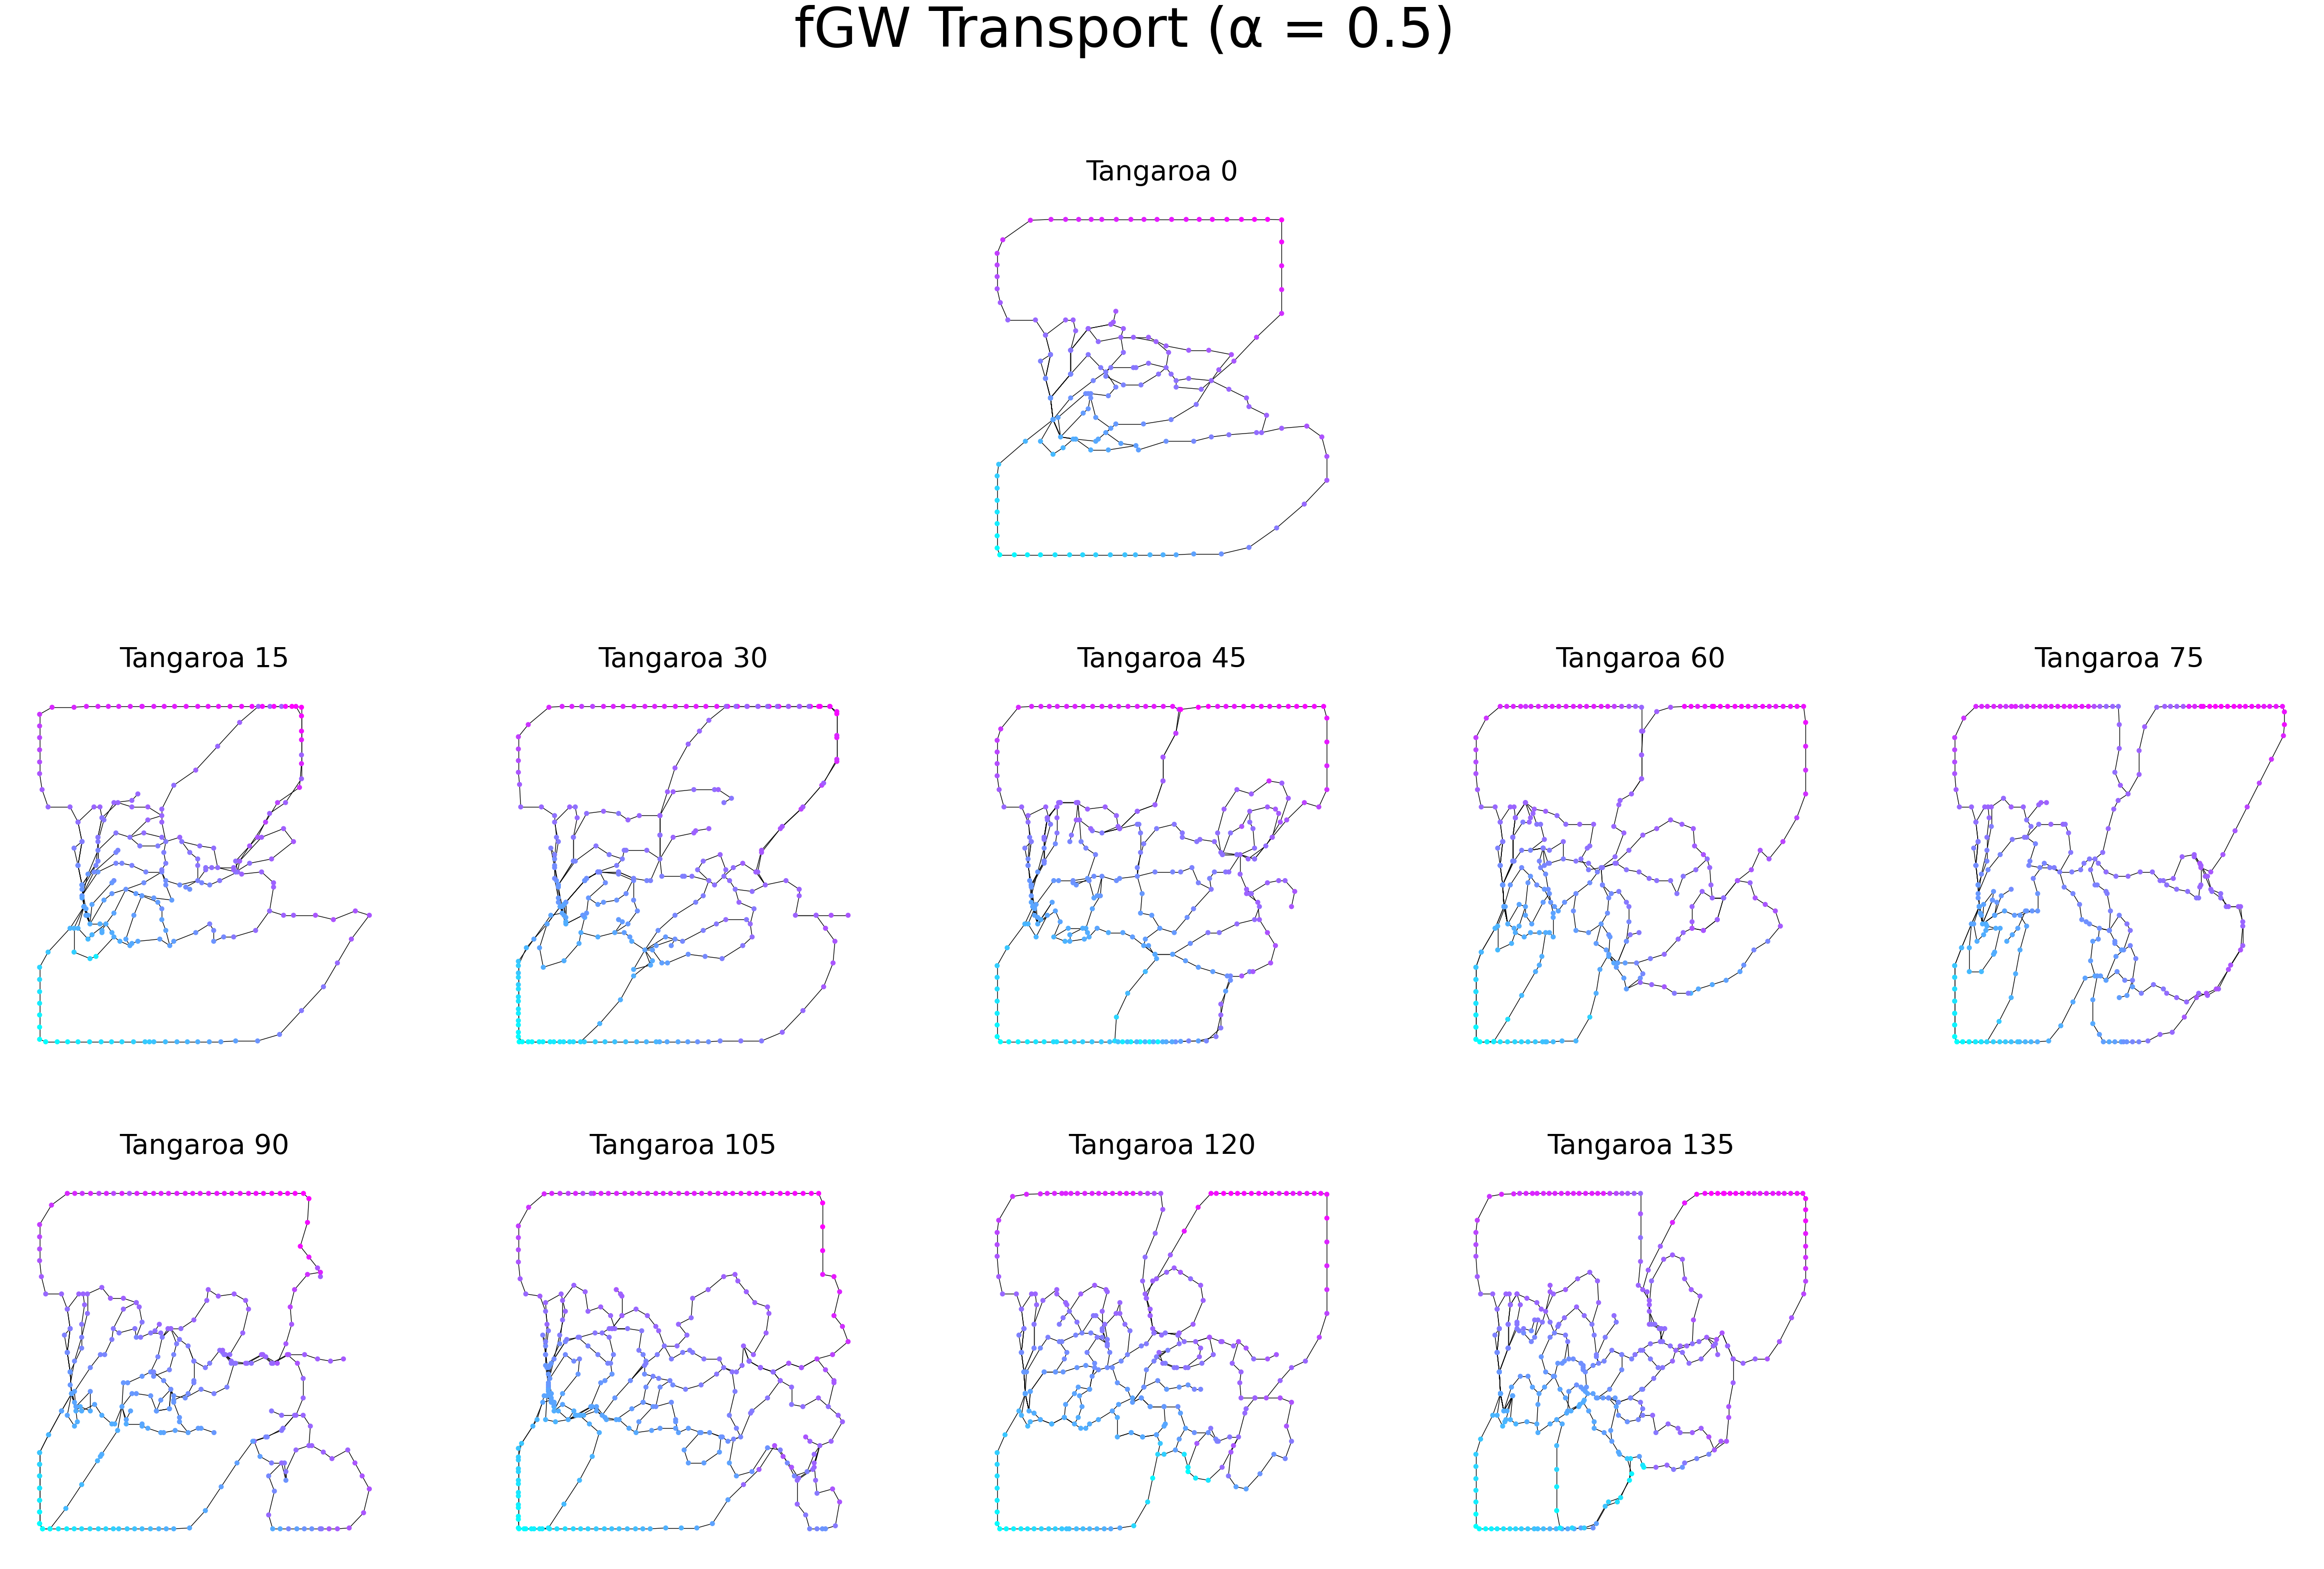

In [13]:
fig = draw_graphs(
  src, dests, 
  width=5, 
  height=3, 
  cmap='cool', 
  src_title='Tangaroa 0', 
  dest_title_fmt='Tangaroa {i}',
  couplings=fgw_couplings
)

fig.suptitle(f'fGW Transport (\u03B1 = {alpha})', fontsize=80)